tb aprox = 1.2038834141966535
cd 159.39596213937992
masa arraste 0.8839358073406971
masa sin arraste 0.7778417179409467
El valor de v0 es: 9999.999999417923 m/s
Sin arrastre 140.07141035914503
Con arrastre 159.42318503806118


C:\Users\leo_1\AppData\Local\Temp\ipykernel_4844\2349149842.py:133: RuntimeWarning: invalid value encountered in log
  term1 = (1 / (2 * k)) * np.log((np.sqrt(g / k) + v0) / (np.sqrt(g / k) - v0))
C:\Users\leo_1\AppData\Local\Temp\ipykernel_4844\2349149842.py:134: RuntimeWarning: invalid value encountered in log
  term2 = (1 / k) * np.log((4 * v0 * np.sqrt(g / k)) / ((g / k) - v0**2))
C:\Users\leo_1\AppData\Local\Temp\ipykernel_4844\2349149842.py:134: RuntimeWarning: divide by zero encountered in log
  term2 = (1 / k) * np.log((4 * v0 * np.sqrt(g / k)) / ((g / k) - v0**2))
C:\Users\leo_1\AppData\Local\Temp\ipykernel_4844\2349149842.py:138: RuntimeWarning: invalid value encountered in log
  term1 = (1 / (2 * k)) * np.log((np.sqrt(g / k) + v0) / (np.sqrt(g / k) - v0))
C:\Users\leo_1\AppData\Local\Temp\ipykernel_4844\2349149842.py:139: RuntimeWarning: divide by zero encountered in log
  term2 = (1 / k) * np.log((4 * v0 * np.sqrt(g / k)) / ((g / k) - v0**2))
C:\Users\leo_1\AppData\Local\Te

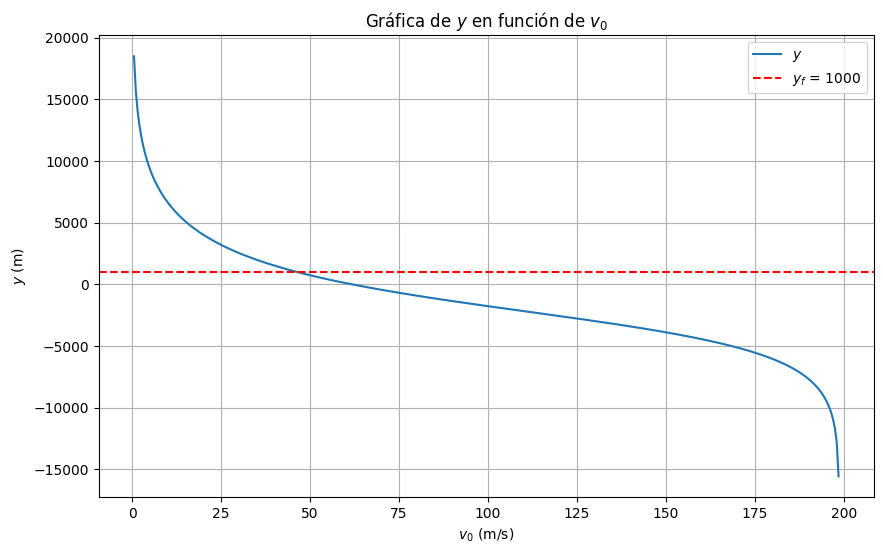

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte

def Cf2_(pe, po, pa, At, Ae, k):
    term1 = np.sqrt((2 * k**2 / (k - 1)) * (2 / (k + 1))**((k + 1) / (k - 1)) * (1 - (pe / po)**((k - 1) / k)))
    term2 = ((pe - pa) / po) * (Ae / At)
    return term1 + term2

def ex_vel(R, To, k):
    a = (k+1)/(k-1)
    c = np.sqrt(R*To/(k*(2/(k+1))**a))
    return c 

def RatArea(M1, M2, k):
    a=(k+1)/(2*(k-1))
    b=(k-1)/2
    return (M2/M1)*(((1+b*(M1**2))/(1+b*(M2**2)))**a)

def mach(P, Po, k):
    return np.sqrt((2/(k-1))*((Po/P)**((k-1)/k)- 1))

To_T = 1720
rho_T = 1.889
k = 1.133
M = 0.04020
a = 8.26
n = 0.319

# Parámetros conocidos
alpha = 15*np.pi/180 # angulo de la divergencia de la tobera 
beta = 40*np.pi/180 # Angulo de convergencia

# Diametros
Dc = 2*25.4  #mm Diametro de la camara 
Df = 3.1 # in, diametro fuselaje
Dt =  12 # mm, de pulgadas a mm [(in)*(mm/in)]
Dp =  .65*25.4 # mm, de pulgadas a mm [(in)*(mm/in)] # Diametro del port
In = 0 # ancho de los inhibidores y/o revestimiento del grano


# Areas
Af = np.pi*(Df/(2*39.3701))**2 # [m**2] # área  del fuselaje
Ac = np.pi*(Dc/2)**2 # mm**2 # área de la camara
At = np.pi*(Dt/2)**2 # mm**2 # área de la garganta
Ap = np.pi*(Dp/2)**2 # mm**2 # área del port
AcAt = Ac/At
ApAt = Ap/At

L_t = 3 # mm
L_Dt = L_t/Dt

Cd =  0.5  # coeficiente de arrastre

if L_Dt > 0.45:
    N_throat = 0.95
else:
    N_throat = 0.99 - 0.0333*L_Dt
N_noz = 0.85 # # eficiencia de la tobera
N_com = 0.95 # eficiencia de combustion
N_div = 1/2*(1 + np.cos(alpha)) # factor de corrección por la divergencia
N_po = 0.95 # factor de corrección de la presion de la camara
N_skin = 0.99


rho_rat = 0.90 
RelacionSeparacion = 0.4 # 40 % segun el criterio de Summerfield
To = To_T*N_com # Temperatura "real"
rho = rho_T*rho_rat    # g/cm^3 densidad medida

# %%


Pa = 14.69 # psi, presion atmosferica
Pe = Pa #P0*((k+1)/2)**(-k/(k-1)) #psi, presion de salida de la tobera
P0 = 800 #vPe*((k+1)/2)**(k/(k-1)) #psi, presion de la camara objetivo

# Mach
Mt = 1
Me = mach(Pe, P0, k)


#%%
# Condiciones del Cohete
theta_0 = np.pi/2 #angulo
m = 6 # masa del cohete sin propelente


# Medidas de salida
AeAt = RatArea(Me, Mt, k)
Ae = At*AeAt
De = Ae


Tb_aprox = (Dc-Dp)/(2*a*(P0/145.038)**n)
print(f'tb aprox = {Tb_aprox}')
# %%



Datos = 10000 # cantidad de datos para la regresión del grano
h0 = 1000 # altura deseada 


Cf = N_noz*(N_skin*Cf2_(Pe, (P0 + Pa), Pa, At, Ae, k)+(1-N_skin))
c_ast = ex_vel(cte.R/M, To, k)
Ve1 = c_ast*Cf # Velocidad de salida de los gases de la tobera


rho =1.225
Cd = 0.5
A=np.pi*(3.1/39.3701/2)**2
m = 6
k = 1/(2*m)*rho*Cd*A   # constante (1/s)
y0 = 0    # altura inicial (m)
y = 1000    # altura final (m)

V0 = np.sqrt(cte.g/k*(np.exp(2*k*(y-y0))-1))
print(f'cd {V0}')

mp0 = m*(np.exp((np.sqrt(2*cte.g*h0)+cte.g*Tb_aprox)/Ve1)-1)

mp01 = m*(np.exp((V0+cte.g*Tb_aprox)/Ve1)-1)

print(f'masa arraste {mp01}')
print(f'masa sin arraste {mp0}')

g = 9.81  # gravedad (m/s^2)


# Definir la función a resolver
def f(v0):
    term1 = (1 / (2 * k)) * np.log((np.sqrt(g / k) + v0) / (np.sqrt(g / k) - v0))
    term2 = (1 / k) * np.log((4 * v0 * np.sqrt(g / k)) / ((g / k) - v0**2))
    return y0 + term1 - term2 - y

def f2(v0):
    term1 = (1 / (2 * k)) * np.log((np.sqrt(g / k) + v0) / (np.sqrt(g / k) - v0))
    term2 = (1 / k) * np.log((4 * v0 * np.sqrt(g / k)) / ((g / k) - v0**2))
    return  term1 - term2

# Método de la bisección
def bisection(func, a, b, tol=1e-6):
    if func(a) * func(b) >= 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos")
    while (b - a) / 2.0 > tol:
        midpoint = (a + b) / 2.0
        if func(midpoint) == 0:
            return midpoint
        elif func(a) * func(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
    return (a + b) / 2.0

# Intervalo inicial para v0
a = -10000  # Límite inferior
b = 10000   # Límite superior


v0 = np.sqrt((g / k) * (np.exp(2 * k * (y - y0)) - 1))
# Encontrar la raíz usando el método de la bisección
v0_solution = bisection(f, a, b)

print(f"El valor de v0 es: {v0_solution} m/s")
print(f'Sin arrastre {np.sqrt(2*y*g)}')
print(f'Con arrastre {v0}')

# Crear un rango de valores de v0
v0_values = np.linspace(0, 200, 400)
y_values = f2(v0_values)

# Graficar la función y
plt.figure(figsize=(10, 6))
plt.plot(v0_values, y_values, label='$y$')
plt.axhline(y=y, color='r', linestyle='--', label=f'$y_f$ = {y}')
plt.xlabel('$v_0$ (m/s)')
plt.ylabel('$y$ (m)')
plt.title('Gráfica de $y$ en función de $v_0$')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from scipy.integrate import simps
import numpy as np

# Valores de entrada (ejemplo)
t_values = np.array([0, 10, 20, 30, 40, 50])  # en segundos
u_values = np.array([300, 290, 280, 270, 260, 250])  # en m/s
rho_values = np.array([1.225, 1.200, 1.175, 1.150, 1.125, 1.100])  # en kg/m^3
t_p = 50  # tiempo de combustión en segundos
zeta = 0.3  # fracción de masa de propulsor

# Función que calcula el integrando para cada valor de t
def integrand(t, u, rho):
    return 0.5 * rho * u**2 / (1 - zeta * t / t_p)

# Valores del integrando
f_values = integrand(t_values, u_values, rho_values)

# Calcular la integral usando el método de Simpson
B = simps(f_values, t_values)
print(f"B = {B}")


B = 2592464.290044709


In [3]:
import numpy as np

# Valores de entrada (ejemplo)
t_values = np.array([0, 10, 20, 30, 40, 50])  # en segundos
u_values = np.array([300, 290, 280, 270, 260, 250])  # en m/s
rho_values = np.array([1.225, 1.200, 1.175, 1.150, 1.125, 1.100])  # en kg/m^3
t_p = 50  # tiempo de combustión en segundos
zeta = 0.3  # fracción de masa de propulsor

# Función que calcula el integrando para cada valor de t
def integrand(t, u, rho):
    return 0.5 * rho * u**2 / (1 - zeta * t / t_p)

# Valores del integrando
f_values = integrand(t_values, u_values, rho_values)

# Calcular la integral usando el método del trapecio
B = np.trapz(f_values, t_values)
print(f"B = {B}")


B = 2592896.287591768


In [3]:
# Parámetros
d1 = 2e-3      # Grosor del recubrimiento
d2 = 0.005      # Grosor de la barra en metros
k1 = 0.18      # Conductividad térmica en W/(m·K)
k2 = 167       # Conductividad térmica en W/(m·K)
rho1 = 930     # Densidad del cubrimiento en kg/m³
rho2 = 2700    # Densidad de la carcasa en kg/m³
cp1 = 1340     # Capacidad calorífica del cubrimiento en J/(kg·K)
cp2 = 896      # Capacidad calorífica de la carcasa en J/(kg·K)
h = 1000       # Coeficiente de transferencia de calor por convección en W/(m²·K)
T_g = 2000     # Temperatura de los gases de combustión en K
T0 = 25        # Temperatura inicial de la carcasa en K
n = 501        # Número de puntos espaciales
#dt = 0.0001    # Paso de tiempo en segundos
t_period = 1   # Tiempo máximo de simulación en segundos

0
1
2
3
4
5


In [14]:
import numpy as np
d = 10
n = 100
x = np.linspace(0, d, n)
y = np.linspace(0, d, 2)
x =np.append(x,2)
print(len(x), x*x)

101 [0.00000000e+00 1.02030405e-02 4.08121620e-02 9.18273646e-02
 1.63248648e-01 2.55076013e-01 3.67309458e-01 4.99948985e-01
 6.52994592e-01 8.26446281e-01 1.02030405e+00 1.23456790e+00
 1.46923783e+00 1.72431385e+00 1.99979594e+00 2.29568411e+00
 2.61197837e+00 2.94867871e+00 3.30578512e+00 3.68329762e+00
 4.08121620e+00 4.49954086e+00 4.93827160e+00 5.39740843e+00
 5.87695133e+00 6.37690032e+00 6.89725538e+00 7.43801653e+00
 7.99918376e+00 8.58075707e+00 9.18273646e+00 9.80512193e+00
 1.04479135e+01 1.11111111e+01 1.17947148e+01 1.24987246e+01
 1.32231405e+01 1.39679625e+01 1.47331905e+01 1.55188246e+01
 1.63248648e+01 1.71513111e+01 1.79981635e+01 1.88654219e+01
 1.97530864e+01 2.06611570e+01 2.15896337e+01 2.25385165e+01
 2.35078053e+01 2.44975003e+01 2.55076013e+01 2.65381084e+01
 2.75890215e+01 2.86603408e+01 2.97520661e+01 3.08641975e+01
 3.19967350e+01 3.31496786e+01 3.43230283e+01 3.55167840e+01
 3.67309458e+01 3.79655137e+01 3.92204877e+01 4.04958678e+01
 4.17916539e+01 4.31

201 202
[6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 6.90310847e-05 6.90310847e-05 6.90310847e-05
 6.90310847e-05 

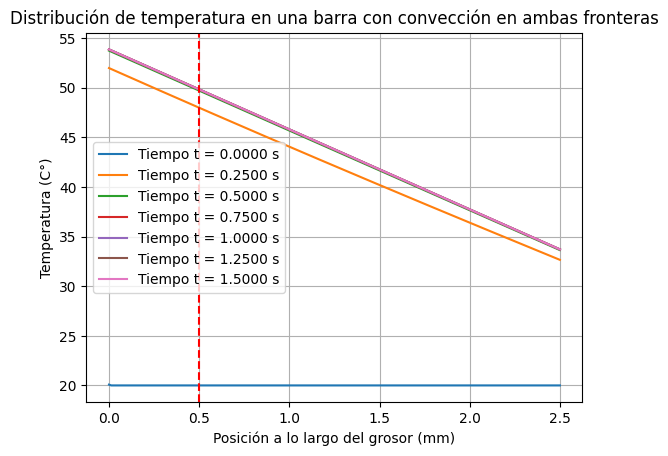

In [15]:
import numpy as np
import matplotlib.pyplot as plt

p = 5



def resolver_ecuacion_calor_conveccion_un_lado(d1, d2, k1, k2, rho1, rho2, cp1, cp2, h_interno, h_externo, T_g, T_aire, T0, n, t_max):
    
    d = d1 + d2
    dx = d / (n - 1)  # Tamaño del paso espacial

    # Crear la lista de distancias
    x = np.linspace(0, d, n)

    # Inicializar los arrays de k, cp, y rho
    k = np.empty(n)
    cp = np.empty(n)
    rho = np.empty(n)

    # Asignar las propiedades en función de la posición
    k[x <= d1] = k1
    k[(x > d1)] = k2
    k = np.append(k, 0.02551)

    cp[x <= d1] = cp1
    cp[(x > d1) ] = cp2
    cp = np.append(cp, 1007)

    rho[x <= d1] = rho1
    rho[(x > d1)] = rho2
    rho = np.append(rho, 1.184)

    # Calcular la difusividad térmica
    alpha = k / (rho * cp)
    print(len(x), len(alpha))
    print(alpha)

    dt = 0.4 * dx ** 2 / np.max(alpha)
    print(dt, np.max(alpha))
    r = alpha * dt / (dx ** 2)  # Número de Fourier
    print(np.min(alpha), np.max(alpha))
    
    # Inicialización de la temperatura
    T = np.ones(n) * T0

    # Tiempo de simulación
    num_steps = int(t_max / dt)
    
    # Matriz para almacenar la temperatura en todos los puntos en todos los pasos de tiempo
    temperaturas_tiempo = np.zeros((num_steps, n))
    
    # Evolución temporal usando operaciones vectorizadas
    for Nt in range(num_steps):
        T_new = T.copy()
        
        # Actualización de la temperatura en el interior de la barra
        T_new[1:-1] = T[1:-1] + r[1:-2] * (T[2:] - 2 * T[1:-1] + T[:-2])
        
        # Aplicar condición de frontera izquierda (convección con los gases de combustión)
        T_new[0] = T[0] + (2 * alpha[0] * dt / dx ** 2) * (T[1] - T[0]) + (2 * h_interno * dt / (rho[0] * cp[0] * dx)) * (T_g - T[0])
        
        # Aplicar condición de frontera derecha (convección con el aire)
        T_new[-1] = T[-1] + (2 * alpha[-1] * dt / dx ** 2) * (T[-2] - T[-1]) + (2 * h_externo * dt / (rho[-1] * cp[-1] * dx)) * (T_aire - T[-1])
        
        # Actualizar la temperatura para el siguiente paso temporal
        T = T_new.copy()
        
        # Guardar la distribución de temperatura en el tiempo actual
        temperaturas_tiempo[Nt, :] = T
    
    # Devolver las distancias y la matriz de temperaturas
    return x, dt, temperaturas_tiempo

# Parámetros
d1 = 5e-4      # Grosor del recubrimiento
d2 = 2e-3     # Grosor de la barra en metros
k1 = 167      # Conductividad térmica en W/(m·K)
k2 = 167      # Conductividad térmica en W/(m·K)
rho1 = 2700   # Densidad del cubrimiento en kg/m³
rho2 = 2700   # Densidad de la carcasa en kg/m³
cp1 = 896     # Capacidad calorífica del cubrimiento en J/(kg·K)
cp2 = 896     # Capacidad calorífica de la carcasa en J/(kg·K)
h_interno = 1000  # Coeficiente de transferencia de calor por convección (interno) en W/(m²·K)
h_externo = 15    # Coeficiente de transferencia de calor por convección (externo, aire) en W/(m²·K)
T_g = 1400 + 273.15  # Temperatura de los gases de combustión en K
T_aire = 20 + 273.15 # Temperatura del aire en K
T0 = 20 + 273.15     # Temperatura inicial de la carcasa en K
n = 201              # Número de puntos espaciales
t_period = 1.5      # Tiempo máximo de simulación en segundos

# Calcular la distribución de temperatura para diferentes tiempos
x, dt, temperaturas = resolver_ecuacion_calor_conveccion_un_lado(d1, d2, k1, k2, rho1, rho2, cp1, cp2, h_interno, h_externo, T_g, T_aire, T0, n, t_period)

# Graficar la distribución de temperatura en diferentes momentos del tiempo
num_plots = 7  # Número de gráficos que se desean generar
timesteps = np.linspace(0, temperaturas.shape[0] - 1, num_plots).astype(int)

for l in range(num_plots):
    G = int(t_period/dt/(num_plots-1))
    plt.plot(x*1e3, temperaturas[G*l, :]-273.15, label=f'Tiempo t = {G*l*dt:.4f} s')

# Añadir etiquetas y leyenda
plt.xlabel('Posición a lo largo del grosor (mm)')
plt.ylabel('Temperatura (C°)')
plt.title('Distribución de temperatura en una barra con convección en ambas fronteras')
plt.legend()
plt.grid(True)
plt.axvline(x=d1*1e3, linestyle='--', color='red', label='Frontera entre materiales')
plt.show()


1.4443909484833895e-07 6.903108465608466e-05


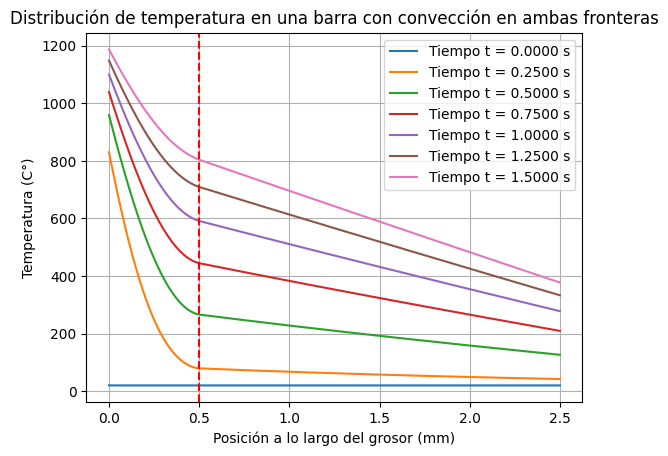

In [19]:
import numpy as np
import matplotlib.pyplot as plt

p = 5



def resolver_ecuacion_calor_conveccion_un_lado(d1, d2, k1, k2, rho1, rho2, cp1, cp2, h_interno, h_externo, T_g, T_aire, T0, n, t_max):
    #propiedades del aire
    h_aire = 15  
    
    d = d1 + d2
    dx = d / (n - 1)  # Tamaño del paso espacial

   # Crear la lista de distancias
    x = np.linspace(0, d, n)

    # Inicializar los arrays de k, cp, y rho
    k = np.empty(n)
    cp = np.empty(n)
    rho = np.empty(n)

    # Asignar las propiedades en función de la posición
    k[x <= d1] = k1
    k[(x > d1)] = k2
    k = np.append(k, 0.02551)

    cp[x <= d1] = cp1
    cp[(x > d1) ] = cp2
    cp = np.append(cp, 1007)

    rho[x <= d1] = rho1
    rho[(x > d1)] = rho2
    rho = np.append(rho, 1.184)

    alpha = k / (rho * cp)  # Difusividad térmica
    dt = 0.4 * dx ** 2 / np.max(alpha)
    r = alpha * dt / (dx ** 2)  # Número de Fourier
    print(np.min(alpha), np.max(alpha))
    
    # Inicialización de la temperatura
    T = np.ones(n) * T0

    # Tiempo de simulación
    num_steps = int(t_max / dt)
    
    # Matriz para almacenar la temperatura en todos los puntos en todos los pasos de tiempo
    temperaturas_tiempo = np.zeros((num_steps, n))
    
    # Evolución temporal usando operaciones vectorizadas
    for Nt in range(num_steps):
        T_new = T.copy()
        
        # Actualización de la temperatura en el interior de la barra
        T_new[1:-1] = T[1:-1] + r[1:-2] * (T[2:] - 2 * T[1:-1] + T[:-2])
        
        # Aplicar condición de frontera izquierda (convección con los gases de combustión)
        T_new[0] = T[0] + (2 * alpha[0] * dt / dx ** 2) * (T[1] - T[0]) + (2 * h_interno * dt / (rho[0] * cp[0] * dx)) * (T_g - T[0])
        
        # Aplicar condición de frontera derecha (convección con el aire)
        T_new[-1] = T[-1] + (2 * alpha[-1] * dt / dx ** 2) * (T[-2] - T[-1]) + (2 * h_externo * dt / (rho[-1] * cp[-1] * dx)) * (T_aire - T[-1])
        
        # Actualizar la temperatura para el siguiente paso temporal
        T = T_new.copy()
        
        # Guardar la distribución de temperatura en el tiempo actual
        temperaturas_tiempo[Nt, :] = T
    
    # Devolver las distancias y la matriz de temperaturas
    return x, dt, temperaturas_tiempo

# Parámetros
d1 = 5e-4      # Grosor del recubrimiento
d2 = 2e-3     # Grosor de la barra en metros
k1 = .18      # Conductividad térmica en W/(m·K)
k2 = 167      # Conductividad térmica en W/(m·K)
rho1 = 930   # Densidad del cubrimiento en kg/m³
rho2 = 2700   # Densidad de la carcasa en kg/m³
cp1 = 1340     # Capacidad calorífica del cubrimiento en J/(kg·K)
cp2 = 896     # Capacidad calorífica de la carcasa en J/(kg·K)
h_interno = 1000  # Coeficiente de transferencia de calor por convección (interno) en W/(m²·K)
h_externo = 15    # Coeficiente de transferencia de calor por convección (externo, aire) en W/(m²·K)
T_g = 1400 + 273.15  # Temperatura de los gases de combustión en K
T_aire = 20 + 273.15 # Temperatura del aire en K
T0 = 20 + 273.15     # Temperatura inicial de la carcasa en K
n = 201              # Número de puntos espaciales
t_period = 1.5      # Tiempo máximo de simulación en segundos

# Calcular la distribución de temperatura para diferentes tiempos
x, dt, temperaturas = resolver_ecuacion_calor_conveccion_un_lado(d1, d2, k1, k2, rho1, rho2, cp1, cp2, h_interno, h_externo, T_g, T_aire, T0, n, t_period)

# Graficar la distribución de temperatura en diferentes momentos del tiempo
num_plots = 7  # Número de gráficos que se desean generar
timesteps = np.linspace(0, temperaturas.shape[0] - 1, num_plots).astype(int)

for l in range(num_plots):
    G = int(t_period/dt/(num_plots-1))
    plt.plot(x*1e3, temperaturas[G*l, :]-273.15, label=f'Tiempo t = {G*l*dt:.4f} s')

# Añadir etiquetas y leyenda
plt.xlabel('Posición a lo largo del grosor (mm)')
plt.ylabel('Temperatura (C°)')
plt.title('Distribución de temperatura en una barra con convección en ambas fronteras')
plt.legend()
plt.grid(True)
plt.axvline(x=d1*1e3, linestyle='--', color='red', label='Frontera entre materiales')
plt.show()

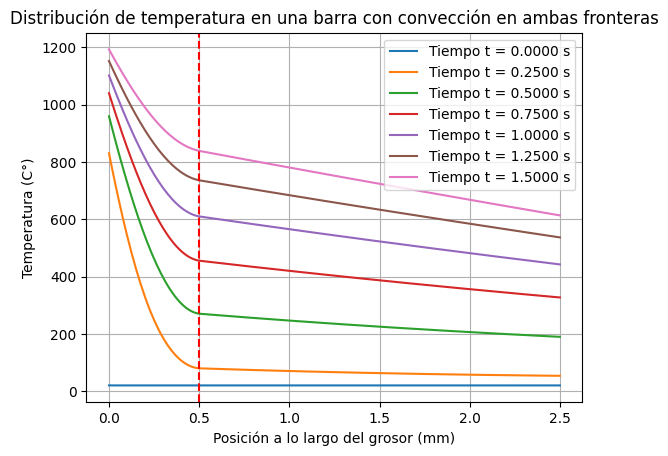

In [21]:
import numpy as np
import matplotlib.pyplot as plt

p = 5

def resolver_ecuacion_calor_conveccion_un_lado(d1, d2, k1, k2, rho1, rho2, cp1, cp2, h_interno, h_externo, T_g, T_aire, T0, n, t_max):
    # Propiedades del aire
    rho_aire = 1.184
    cp_aire = 1007
    
    d = d1 + d2
    dx = d / (n - 1)  # Tamaño del paso espacial

    # Crear la lista de distancias
    x = np.linspace(0, d, n)

    # Inicializar los arrays de k, cp, y rho con el mismo tamaño
    k = np.ones(n)
    cp = np.ones(n)
    rho = np.ones(n)

    # Asignar las propiedades en función de la posición
    k[x <= d1] = k1
    k[(x > d1)] = k2

    cp[x <= d1] = cp1
    cp[(x > d1)] = cp2

    rho[x <= d1] = rho1
    rho[(x > d1)] = rho2

    # Calcular la difusividad térmica
    alpha = k / (rho * cp)
    dt = 0.4 * dx ** 2 / np.max(alpha)  # Estabilidad de tiempo
    r = alpha * dt / (dx ** 2)  # Número de Fourier
    
    # Inicialización de la temperatura
    T = np.ones(n) * T0

    # Tiempo de simulación
    num_steps = int(t_max / dt)
    
    # Matriz para almacenar la temperatura en todos los puntos en todos los pasos de tiempo
    temperaturas_tiempo = np.zeros((num_steps, n))
    
    # Evolución temporal usando operaciones vectorizadas
    for Nt in range(num_steps):
        T_new = T.copy()
        
        # Actualización de la temperatura en el interior de la barra
        T_new[1:-1] = T[1:-1] + r[1:-1] * (T[2:] - 2 * T[1:-1] + T[:-2])
        
        # Aplicar condición de frontera izquierda (convección con los gases de combustión)
        T_new[0] = T[0] + (2 * alpha[0] * dt / dx ** 2) * (T[1] - T[0]) + (2 * h_interno * dt / (rho[0] * cp[0] * dx)) * (T_g - T[0])
        
        # Aplicar condición de frontera derecha (convección con el aire)
        T_new[-1] = T[-1] + (2 * alpha[-2] * dt / dx ** 2) * (T[-2] - T[-1]) + (2 * h_externo * dt / (rho_aire * cp_aire * dx)) * (T_aire - T[-1])
        
        # Actualizar la temperatura para el siguiente paso temporal
        T = T_new.copy()
        
        # Guardar la distribución de temperatura en el tiempo actual
        temperaturas_tiempo[Nt, :] = T
    
    # Devolver las distancias y la matriz de temperaturas
    return x, dt, temperaturas_tiempo

# Parámetros
d1 = 5e-4      # Grosor del recubrimiento
d2 = 2e-3     # Grosor de la barra en metros
k1 = .18      # Conductividad térmica en W/(m·K)
k2 = 167      # Conductividad térmica en W/(m·K)
rho1 = 930   # Densidad del cubrimiento en kg/m³
rho2 = 2700   # Densidad de la carcasa en kg/m³
cp1 = 1340     # Capacidad calorífica del cubrimiento en J/(kg·K)
cp2 = 896     # Capacidad calorífica de la carcasa en J/(kg·K)
h_interno = 1000  # Coeficiente de transferencia de calor por convección (interno) en W/(m²·K)
h_externo = 15    # Coeficiente de transferencia de calor por convección (externo, aire) en W/(m²·K)
T_g = 1400 + 273.15  # Temperatura de los gases de combustión en K
T_aire = 20 + 273.15 # Temperatura del aire en K
T0 = 20 + 273.15     # Temperatura inicial de la carcasa en K
n = 201              # Número de puntos espaciales
t_period = 1.5      # Tiempo máximo de simulación en segundos

# Calcular la distribución de temperatura para diferentes tiempos
x, dt, temperaturas = resolver_ecuacion_calor_conveccion_un_lado(d1, d2, k1, k2, rho1, rho2, cp1, cp2, h_interno, h_externo, T_g, T_aire, T0, n, t_period)

# Graficar la distribución de temperatura en diferentes momentos del tiempo
num_plots = 7  # Número de gráficos que se desean generar
timesteps = np.linspace(0, temperaturas.shape[0] - 1, num_plots).astype(int)

for l in range(num_plots):
    G = int(t_period/dt/(num_plots-1))
    plt.plot(x*1e3, temperaturas[G*l, :]-273.15, label=f'Tiempo t = {G*l*dt:.4f} s')

# Añadir etiquetas y leyenda
plt.xlabel('Posición a lo largo del grosor (mm)')
plt.ylabel('Temperatura (C°)')
plt.title('Distribución de temperatura en una barra con convección en ambas fronteras')
plt.legend()
plt.grid(True)
plt.axvline(x=d1*1e3, linestyle='--', color='red', label='Frontera entre materiales')
plt.show()


In [ ]:
import tkinter as tk

# Función que se ejecutará al presionar el botón
def accion():
    texto = entrada.get()  # Obtener el texto del cuadro de entrada
    label.config(text=f"Has escrito: {texto}")

# Crear la ventana principal
root = tk.Tk()
root.title("Mi Interfaz Gráfica")
root.geometry("300x150")

# Crear un cuadro de texto para ingresar datos
entrada = tk.Entry(root)
entrada.pack()

# Crear un botón que llama a la función accion
boton = tk.Button(root, text="Aceptar", command=accion)
boton.pack()

# Crear una etiqueta donde se mostrará el texto ingresado
label = tk.Label(root, text="Escribe algo y presiona el botón")
label.pack()

# Mantener la ventana abierta
root.mainloop()
